In [2]:
#We will be using a Deep Learning Model because we have 5 Classifications (1-5 star yelp ratings) and whether those correlate to a 1-3 Michelin Star resturant.

# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

#  Import and read the ca_michelin_yelp_data.csv.
michelin_star_df = pd.read_csv("ca_michelin_yelp_data.csv") 
michelin_star_df.head()

,name,review count,rating,price rating,year,latitude,longitude,city,region,zipCode,cuisine,price,url,stars,yelp url
0,Chez TJ,735 reviews,4 star rating,$$$$,2019.0,37.394680,-122.08044,South San Francisco,California,94041,Contemporary,$$$$,https://guide.michelin.com/us/en/california/so...,1.0,https://www.yelp.com/biz/chez-tj-mountain-view...
1,Protégé,348 reviews,4.5 star rating,$$$$,2019.0,37.427853,-122.14362,South San Francisco,California,94301,Contemporary,$$$,https://guide.michelin.com/us/en/california/so...,1.0,https://www.yelp.com/biz/prot%C3%A9g%C3%A9-pal...
2,Madera,886 reviews,3.5 star rating,$$$,2019.0,37.420140,-122.21151,San Francisco,California,94025,Contemporary,$$$,https://guide.michelin.com/us/en/california/sa...,1.0,https://www.yelp.com/biz/madera-menlo-park?osq...
3,The Village Pub,1088 reviews,4 star rating,$$$$,2019.0,37.428970,-122.25178,San Francisco,California,94062,Contemporary,$$$,https://guide.michelin.com/us/en/california/sa...,1.0,https://www.yelp.com/biz/the-village-pub-woods...
4,Plumed Horse,1244 reviews,4 star rating,$$$$,2019.0,37.256480,-122.03537,South San Francisco,California,95070,Contemporary,$$$$,https://guide.michelin.com/us/en/california/so...,1.0,https://www.yelp.com/biz/plumed-horse-saratoga...


In [3]:
michelin_star_df.rename(columns={'review count':'review_counts', 'price rating':'price_rating'}, inplace=True)
michelin_star_df['review_counts'] = michelin_star_df['review_counts'].str.replace(' reviews','').astype(int)
michelin_star_df['rating'] = michelin_star_df['rating'].str.replace(' star rating','')
michelin_star_df.head()

,name,review_counts,rating,price_rating,year,latitude,longitude,city,region,zipCode,cuisine,price,url,stars,yelp url
0,Chez TJ,735,4,$$$$,2019.0,37.394680,-122.08044,South San Francisco,California,94041,Contemporary,$$$$,https://guide.michelin.com/us/en/california/so...,1.0,https://www.yelp.com/biz/chez-tj-mountain-view...
1,Protégé,348,4.5,$$$$,2019.0,37.427853,-122.14362,South San Francisco,California,94301,Contemporary,$$$,https://guide.michelin.com/us/en/california/so...,1.0,https://www.yelp.com/biz/prot%C3%A9g%C3%A9-pal...
2,Madera,886,3.5,$$$,2019.0,37.420140,-122.21151,San Francisco,California,94025,Contemporary,$$$,https://guide.michelin.com/us/en/california/sa...,1.0,https://www.yelp.com/biz/madera-menlo-park?osq...
3,The Village Pub,1088,4,$$$$,2019.0,37.428970,-122.25178,San Francisco,California,94062,Contemporary,$$$,https://guide.michelin.com/us/en/california/sa...,1.0,https://www.yelp.com/biz/the-village-pub-woods...
4,Plumed Horse,1244,4,$$$$,2019.0,37.256480,-122.03537,South San Francisco,California,95070,Contemporary,$$$$,https://guide.michelin.com/us/en/california/so...,1.0,https://www.yelp.com/biz/plumed-horse-saratoga...


In [4]:
# Transform String column 
def change_string(price):
    if price == "$":
        return 1
    elif price == "$$":
        return 2
    elif price == "$$$":
        return 3
    elif price == "$$$$":
        return 4
    elif price == "$$$$$":
        return 5
    else:
        return 0
    
michelin_star_df["price"] = michelin_star_df["price"].apply(change_string)
michelin_star_df.head()

,name,review_counts,rating,price_rating,year,latitude,longitude,city,region,zipCode,cuisine,price,url,stars,yelp url
0,Chez TJ,735,4,$$$$,2019.0,37.394680,-122.08044,South San Francisco,California,94041,Contemporary,4,https://guide.michelin.com/us/en/california/so...,1.0,https://www.yelp.com/biz/chez-tj-mountain-view...
1,Protégé,348,4.5,$$$$,2019.0,37.427853,-122.14362,South San Francisco,California,94301,Contemporary,3,https://guide.michelin.com/us/en/california/so...,1.0,https://www.yelp.com/biz/prot%C3%A9g%C3%A9-pal...
2,Madera,886,3.5,$$$,2019.0,37.420140,-122.21151,San Francisco,California,94025,Contemporary,3,https://guide.michelin.com/us/en/california/sa...,1.0,https://www.yelp.com/biz/madera-menlo-park?osq...
3,The Village Pub,1088,4,$$$$,2019.0,37.428970,-122.25178,San Francisco,California,94062,Contemporary,3,https://guide.michelin.com/us/en/california/sa...,1.0,https://www.yelp.com/biz/the-village-pub-woods...
4,Plumed Horse,1244,4,$$$$,2019.0,37.256480,-122.03537,South San Francisco,California,95070,Contemporary,4,https://guide.michelin.com/us/en/california/so...,1.0,https://www.yelp.com/biz/plumed-horse-saratoga...


In [5]:
# Determine the number of unique values in each column.
michelin_star_df.nunique()

name             66
review_counts    63
rating            3
price_rating      3
year              1
latitude         66
longitude        66
city              5
region            1
zipCode          44
cuisine          15
price             3
url              66
stars             3
yelp url         66
dtype: int64

In [6]:
# Look at Yelp Star Review value counts for binning
yelp_counts = michelin_star_df['review_counts'].sort_values(ascending=True)
yelp_counts

7       63
29      99
47     105
37     120
14     120
      ... 
59    2766
23    2904
43    2975
34    3178
28    5598
Name: review_counts, Length: 67, dtype: int64

<AxesSubplot:ylabel='Density'>

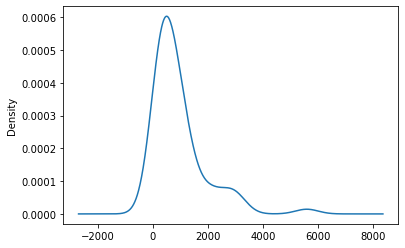

In [7]:
# Visualize the value counts of review_counts
yelp_counts.plot.density()

In [8]:
# Look at STARS value counts for binning
michelinstars_counts = michelin_star_df.stars.value_counts()
michelinstars_counts


1.0    51
2.0    11
3.0     5
Name: stars, dtype: int64

<AxesSubplot:ylabel='Density'>

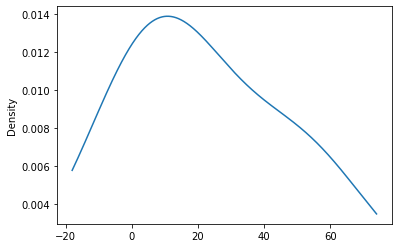

In [9]:
# Visualize the value counts of MICHELINSTARS
michelinstars_counts.plot.density()

In [10]:
# Generate our categorical variable lists
michelin_cat = michelin_star_df.dtypes[michelin_star_df.dtypes == "object"].index.tolist()

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(michelin_star_df[michelin_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(michelin_cat)
encode_df.head()

/Users/erinoneil/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,name_Acquerello,name_Addison,name_Angler,name_Aster,name_Atelier Crenn,name_Auberge du Soleil,name_Aubergine,name_Bar Crenn,name_Baumé,name_Benu,...,yelp url_https://www.yelp.com/biz/sons-and-daughters-san-francisco,yelp url_https://www.yelp.com/biz/sorrel-san-francisco-3,yelp url_https://www.yelp.com/biz/spqr-san-francisco,yelp url_https://www.yelp.com/biz/spruce-san-francisco,yelp url_https://www.yelp.com/biz/state-bird-provisions-san-francisco,yelp url_https://www.yelp.com/biz/sushi-yoshizumi-san-mateo,yelp url_https://www.yelp.com/biz/the-progress-san-francisco-2,yelp url_https://www.yelp.com/biz/the-village-pub-woodside?osq=The+Village+Pub,yelp url_https://www.yelp.com/biz/vespertine-culver-city,yelp url_https://www.yelp.com/biz/wakuriya-san-mateo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
michelin_star_df = michelin_star_df.merge(encode_df,left_index=True, right_index=True)
michelin_star_df = michelin_star_df.drop(michelin_cat,1)
michelin_star_df.head()

/Users/erinoneil/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,review_counts,year,latitude,longitude,zipCode,price,stars,name_Acquerello,name_Addison,name_Angler,...,yelp url_https://www.yelp.com/biz/sons-and-daughters-san-francisco,yelp url_https://www.yelp.com/biz/sorrel-san-francisco-3,yelp url_https://www.yelp.com/biz/spqr-san-francisco,yelp url_https://www.yelp.com/biz/spruce-san-francisco,yelp url_https://www.yelp.com/biz/state-bird-provisions-san-francisco,yelp url_https://www.yelp.com/biz/sushi-yoshizumi-san-mateo,yelp url_https://www.yelp.com/biz/the-progress-san-francisco-2,yelp url_https://www.yelp.com/biz/the-village-pub-woodside?osq=The+Village+Pub,yelp url_https://www.yelp.com/biz/vespertine-culver-city,yelp url_https://www.yelp.com/biz/wakuriya-san-mateo
0,735,2019.0,37.394680,-122.08044,94041,4,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,348,2019.0,37.427853,-122.14362,94301,3,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,886,2019.0,37.420140,-122.21151,94025,3,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1088,2019.0,37.428970,-122.25178,94062,3,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1244,2019.0,37.256480,-122.03537,95070,4,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Split our preprocessed data into our features and target arrays
y = michelin_star_df['stars']
X = michelin_star_df.drop(columns='stars')

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Random Forest

In [16]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.765


## Logistic Regression

In [17]:
# ***Find P-value for columns/which has more impact? 

# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.765


## Deep Learning Model

In [18]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 20
hidden_nodes_layer2 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                4640      
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 4,861
Trainable params: 4,861
Non-trainable params: 0
_________________________________________________________________


2022-03-22 18:38:45.728541: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}hdf5"

In [21]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
2/2 [==============================] - 1s 6ms/step - loss: -0.1058 - accuracy: 0.7600
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: -0.1855 - accuracy: 0.7600
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: -0.2500 - accuracy: 0.7600
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: -0.3286 - accuracy: 0.7600
Epoch 5/100
1/2 [==============>...............] - ETA: 0s - loss: -0.3781 - accuracy: 0.7500
Epoch 5: saving model to checkpoints/weights.05hdf5
2/2 [==============================] - 0s 46ms/step - loss: -0.3961 - accuracy: 0.7600
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: -0.4632 - accuracy: 0.7600
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: -0.5310 - accuracy: 0.7600
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: -0.6026 - accuracy: 0.7600
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: -0.6739 - 

2/2 [==============================] - 0s 24ms/step - loss: -13.5913 - accuracy: 0.7600
Epoch 66/100
2/2 [==============================] - 0s 4ms/step - loss: -14.1496 - accuracy: 0.7600
Epoch 67/100
2/2 [==============================] - 0s 5ms/step - loss: -14.8250 - accuracy: 0.7600
Epoch 68/100
2/2 [==============================] - 0s 4ms/step - loss: -15.4209 - accuracy: 0.7600
Epoch 69/100
2/2 [==============================] - 0s 4ms/step - loss: -16.2856 - accuracy: 0.7600
Epoch 70/100
1/2 [==============>...............] - ETA: 0s - loss: -15.3028 - accuracy: 0.7500
Epoch 70: saving model to checkpoints/weights.70hdf5
2/2 [==============================] - 0s 25ms/step - loss: -16.9511 - accuracy: 0.7600
Epoch 71/100
2/2 [==============================] - 0s 4ms/step - loss: -17.7152 - accuracy: 0.7600
Epoch 72/100
2/2 [==============================] - 0s 4ms/step - loss: -18.5230 - accuracy: 0.7600
Epoch 73/100
2/2 [==============================] - 0s 4ms/step - loss: -19

In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: -4.3039e+01 - accuracy: 0.7647 - 134ms/epoch - 134ms/step
Loss: -43.038551330566406, Accuracy: 0.7647058963775635


In [ ]:
# Guess whether it has 1,2,3 only in the michelin data 
# Take that model and include resturants that dont have michelin stars and predict whether a restaurant will gain in the future. 